# <center> <font color = 'orange'>  Gold Price </font>  Prediction </center>

## <font color = 'orange'> Prospective </font> Workflow

1. Get Gold Price Dataset
2. Data Pre-Processing
3. Data Analysis
4. Train-Test Split
5. Random Forest Regressor
6. Model Evaluation

## <font color = 'orange'> About </font> Dataset

The dataset contains the gold prices for over a decade. <br>
The datset is a Comma Separated Value (CSV) file format with 2290 rows and 7 columns.

### <font color = '#F2615B'> Features </font>
- `Date` - date (MM/dd/yyyy format)
- `SPX` - stands for The Standard and Poor's 500 index, or simply the S&P 500. It is a stock market index used for tracking the stock performance of 500 of the largest companies listed on stock exchanges in USA
- `GLD` - gold price
- `USO` - stands for "The United States Oil Fund ® LP (USO)". It is an exchange-traded security whose shares may be purchased and sold on the NYSE Arca
- `SLV` - silver price
- `EUR/USD` - Euro to US dollar exchange ratio

<font color = '#F2615B'> Dataset Link </font> : https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data/data

## <font color = 'orange'> Importing </font> Libraries

In [1]:
## Fundamental libraries
import numpy as np
import pandas as pd

## Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## stopping warnings
import warnings
warnings.filterwarnings('ignore')

## <font color = 'orange'> Importing </font> Dataset and Preprocessing

In [2]:
## importing dataset from directory and
## loading it to the dataframe
gold_data = pd.read_csv('gld_price_data.csv')

In [3]:
## inspecting if the data is loaded
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
## last 5-rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
## dimension of the dataframe
gold_data.shape

(2290, 6)

In [6]:
## basic information about the dataset
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
## confirming the missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
## basic statistical measures
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## <font color = 'orange'> Correlation </font> 

In [9]:
## creating a correlation variable
corr_matrix = gold_data.corr(numeric_only = True)

In [10]:
## correlation matrix
corr_matrix

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


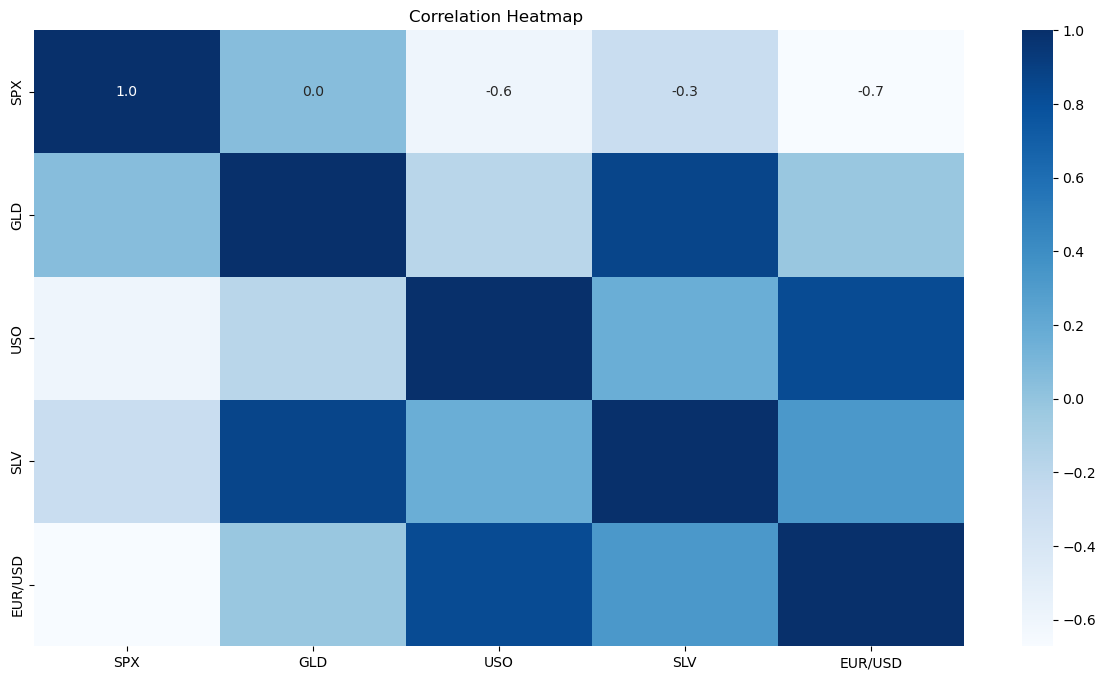

In [11]:
## constructing heatmap
plt.figure(figsize = (15, 8))

sns.heatmap(corr_matrix, cmap = 'Blues', cbar = True,
            fmt = '.1f', annot = True, annot_kws = {'size' : 10})

plt.title('Correlation Heatmap ')

plt.show()


In [12]:
## correlation values of 'GLD'
corr_matrix['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

## <font color = 'orange'> Gold </font> Price Distribution

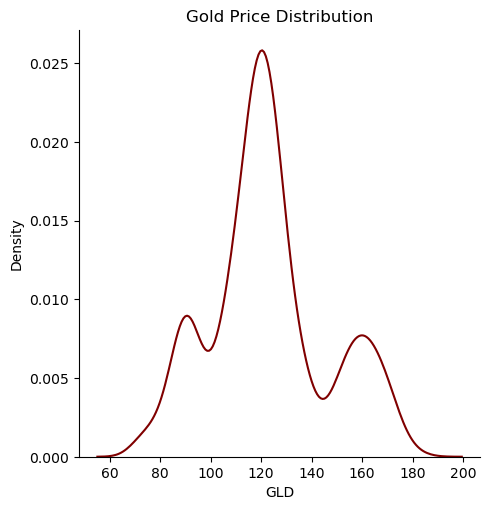

In [14]:
## creating a distribution plot
sns.displot(gold_data['GLD'], kind = 'kde', color = 'maroon')
plt.title('Gold Price Distribution')
plt.show()

## <font color = 'orange'> Splitting </font> Features & Target

In [15]:
X = gold_data.drop(['Date', 'GLD'], axis = 1)
Y = gold_data['GLD']

In [16]:
## verifying the operation
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [17]:
## verifying the operation
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

## <font color = 'orange'> Splitting </font> into Training & Test Data

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

## <font color = 'orange'> Model </font> Training : Random Forest Regressor

In [19]:
regressor = RandomForestRegressor(n_estimators = 100)

In [20]:
## training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

## <font color = 'orange'> Model </font> Evaluation

In [21]:
## prediction on test data
test_data_prediction = regressor.predict(X_test)

In [22]:
print(test_data_prediction)

[168.66269959  81.99409994 116.10270007 127.54150049 120.71840094
 154.54779705 150.39489833 126.25869965 117.40879871 125.9286013
 116.89650051 171.88460037 141.57279865 167.71349922 115.25840037
 117.73080056 138.95430269 170.02460043 158.85990259 158.03239966
 155.12700018 125.20940061 176.10610009 156.80930377 125.26500034
  93.90229986  77.05110022 120.57760026 119.09849945 167.49389949
  88.16370071 125.20639983  91.3124009  117.71950032 121.14879914
 135.98150105 115.38070128 115.21280072 145.86439862 107.05700082
 104.43580241  87.11849785 126.38150091 117.79529988 152.92909915
 119.59840023 108.45370016 107.98649838  93.17770037 127.11239785
  75.21860005 113.67199938 121.51749998 111.2487991  118.79459878
 120.56239915 159.9045005  169.24810134 147.29979704  85.79359843
  94.24680047  86.81029916  90.5924004  118.98890038 126.37980078
 127.60710003 170.45199994 122.24609941 117.36739893  98.48920026
 168.51880144 143.30389807 131.81780244 121.15110256 120.8925994
 119.7066005

In [23]:
## compare the predicted values with actual values
## R-Squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('\nR-Squared Error: ', error_score)


R-Squared Error:  0.9893417696488297


## <font color = 'orange'> Compare </font> Actual Values & Predicted Values in a Plot

In [24]:
## converting Y_test to a list
Y_test = list(Y_test)

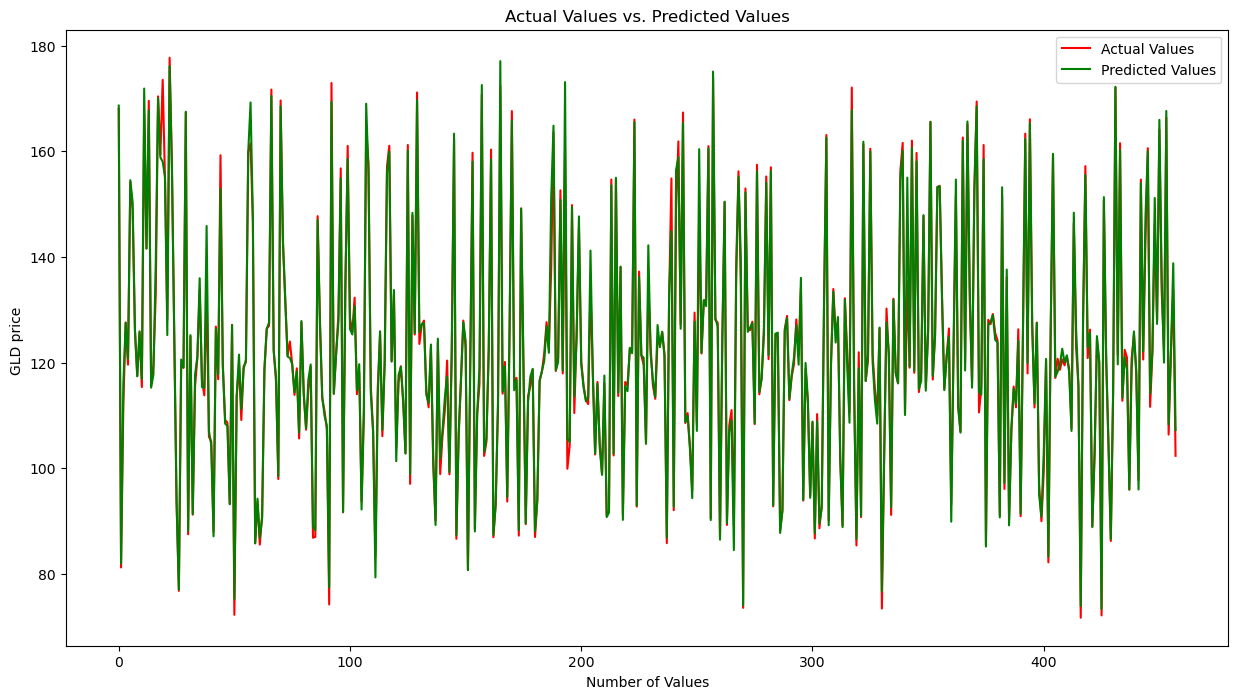

In [25]:
## Plotting
plt.figure(figsize = (15, 8))

plt.plot(Y_test, color = 'red', label = 'Actual Values')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted Values')

plt.title('Actual Values vs. Predicted Values')
plt.xlabel('Number of Values')
plt.ylabel('GLD price ')
plt.legend()

plt.show()

## <center> <font color = 'orange'> By </font> Rahul Pal </center>